![](https://www.formula1.com/content/dam/fom-website/sutton/2020/AbuDhabi/Sunday/1291013771.jpg)

# Problem Statement

`F1` is a competitive sport with inclusion of `Extreme Engineering` and ` Split Second Decision Making`. The decision making is done after considering a lot many parameters and also in the real time. Hence, comes the need of using `Data Science` to improve the performance and try to win it by those left over fraction of seconds.

This is a preliminary study comparing some of the basic variables involved in this highly competitive sport. I have got the dataset from [kaggle](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020) and tried to get some insights into it. The dataset is in the form of multiple .csv files. Each file includes some information about the races conducted between 1950 to 2021(start).

## Contents

1. Reading, Cleaning and Feature Engineering: This section involves reading data from multiple files and combine them as per their relations. It also involves cleaning the dataset as per our need. I have also done some feature engineering to derive some new meaningful features.
2. Univariate/Bivariate/Multivariate Analysis: Here we would be comparing features with respect to each other. I have only added those plots which re resulting into some conclusion.
3. Conclusion: This part is about conclusion drawn from the study.

In [1]:
# !pip install datapane

In [2]:
# !datapane login --token='Your Token'

In [3]:
# Dependancies

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_style('whitegrid')

import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

import warnings
warnings.filterwarnings("ignore")

import datapane as dp 

# 1. Reading, Cleaning and Feature Engineering 

### 1.1 Circuits-Constructors-Drivers

In [4]:
# GP Circuit

circuits = pd.read_csv('circuits.csv')
print(circuits.shape)
print(' ')
print(circuits.info())
print(' ')
circuits.head()

(77, 9)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB
None
 


circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

In [5]:
# Cleaning

circuits = circuits.drop(['circuitRef', 'url'], axis=1)

In [6]:
# F1 Constructors

constructors = pd.read_csv('constructors.csv')
print(constructors.shape)
print(' ')
print(constructors.info())
print(' ')
constructors.head()

(211, 5)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB
None
 


constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [7]:
# Cleaning

constructors = constructors.drop(['name', 'url'], axis=1)

In [8]:
# F1 Drivers

drivers = pd.read_csv('drivers.csv')
print(drivers.shape)
print(' ')
print(drivers.info())
print(' ')
drivers.head()

(853, 9)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     853 non-null    int64 
 1   driverRef    853 non-null    object
 2   number       853 non-null    object
 3   code         853 non-null    object
 4   forename     853 non-null    object
 5   surname      853 non-null    object
 6   dob          853 non-null    object
 7   nationality  853 non-null    object
 8   url          853 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.1+ KB
None
 


driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [9]:
drivers = drivers.drop(['number', 'forename', 'surname', 'url'], axis=1)

### 1.2 Races

In [10]:
# Races

races = pd.read_csv('races.csv')
print(races.shape)
print(' ')
print(races.info())
print(' ')
races.head()

(1058, 8)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1058 non-null   int64 
 1   year       1058 non-null   int64 
 2   round      1058 non-null   int64 
 3   circuitId  1058 non-null   int64 
 4   name       1058 non-null   object
 5   date       1058 non-null   object
 6   time       1058 non-null   object
 7   url        1058 non-null   object
dtypes: int64(4), object(4)
memory usage: 66.2+ KB
None
 


raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url  
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

In [11]:
# Cleaning 

races = races.drop(['url'], axis=1)

### 1.3 Results

In [12]:
# results

results = pd.read_csv('results.csv')
print(results.shape)
print(' ')
print(results.info())
print(' ')
results.head()

(25040, 18)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25040 entries, 0 to 25039
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25040 non-null  int64  
 1   raceId           25040 non-null  int64  
 2   driverId         25040 non-null  int64  
 3   constructorId    25040 non-null  int64  
 4   number           25040 non-null  object 
 5   grid             25040 non-null  int64  
 6   position         25040 non-null  object 
 7   positionText     25040 non-null  object 
 8   positionOrder    25040 non-null  int64  
 9   points           25040 non-null  float64
 10  laps             25040 non-null  int64  
 11  time             25040 non-null  object 
 12  milliseconds     25040 non-null  object 
 13  fastestLap       25040 non-null  object 
 14  rank             25040 non-null  object 
 15  fastestLapTime   25040 non-null  object 
 16  fastestLapSpeed  25040 non-null  object 
 17

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1

### 1.4 Status

In [13]:
# status

status = pd.read_csv('status.csv')
print(status.shape)
print(' ')
print(status.info())
print(' ')
status.head()

(137, 2)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
None
 


statusId        status
0         1      Finished
1         2  Disqualified
2         3      Accident
3         4     Collision
4         5        Engine

### Redefining Dataframes

In [14]:
# concatenating results with status

results_1 = pd.merge(left=results, right=status, left_on='statusId',
         right_on='statusId', how='left')
results_1.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId    status  
0         39    2       1:27.452         218.300         1  Finished  
1         41    3       1:27.739         217.586         1  Finished  
2         41    5       1:28.090         216.719         1  Finished  
3         58    7       1:28.603         215.464         1  Finished  
4         43    1       1:27.418         218.385         1  Finished

In [15]:
# concatenating results with races

results_1 = pd.merge(left=results_1, right=races, left_on='raceId',
                     right_on='raceId', how='left')
results_1.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps       time_x milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId    status  year  \
0         39    2       1:27.452         218.300         1  Finished  2008   
1         41    3       1:27.739         217.586         1  Finished  2008   
2         41    5       1:28.090         216.719         1  Finished  2008   
3         58    7       1:28.603         215.464         1  Finished  2008   
4         43    1       1:27.418         218.385         1  Finished  2008   

   round  circuitId                   name        date    time_y  
0      1          1  Australian Grand Prix  2008-03-16  04:30:00  
1      1          1  Australian Grand Prix  2008-03-16  04:30:00  
2      1          1  Australian Grand Prix  2008-03-16  04:30:00  
3      1          1  Australian Grand Prix  2008-03-16  04:30:00  
4      1          1  Australian Grand Prix  2008-03-16  04:30:00

In [16]:
# concatenating results with drivers

results_1 = pd.merge(left=results_1, right=drivers, left_on='driverId',
                     right_on='driverId', how='left')
results_1.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps       time_x milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId    status  year  \
0         39    2       1:27.452         218.300         1  Finished  2008   
1         41    3       1:27.739         217.586         1  Finished  2008   
2         41    5       1:28.090         216.719         1  Finished  2008   
3         58    7       1:28.603         215.464         1  Finished  2008   
4         43    1       1:27.418         218.385         1  Finished  2008   

   round  circuitId                   name        date    time_y   driverRef  \
0      1          1  Australian Grand Prix  2008-03-16  04:30:00    hamilton   
1      1          1  Australian Grand Prix  2008-03-16  04:30:00    heidfeld   
2      1          1  Australian Grand Prix  2008-03-16  04:30:00     rosberg   
3      1          1  Australian Grand Prix  2008-03-16  04:30:00      alonso   
4      1          1  Australian Grand Prix  2008-03-16  04:30:00  kovalainen   

  code         dob nationality  
0  HAM  1985-01-07     British  
1  HEI  1977-05-10      German  
2  ROS  1985-06-27      German  
3  ALO  1981-07-29     Spanish  
4  KOV  1981-10-19     Finnish

In [17]:
# concatenating results with constructors

results_1 = pd.merge(left=results_1, right=constructors, left_on='constructorId',
                     right_on='constructorId', how='left')
results_1.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps       time_x milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId    status  year  \
0         39    2       1:27.452         218.300         1  Finished  2008   
1         41    3       1:27.739         217.586         1  Finished  2008   
2         41    5       1:28.090         216.719         1  Finished  2008   
3         58    7       1:28.603         215.464         1  Finished  2008   
4         43    1       1:27.418         218.385         1  Finished  2008   

   round  circuitId                   name        date    time_y   driverRef  \
0      1          1  Australian Grand Prix  2008-03-16  04:30:00    hamilton   
1      1          1  Australian Grand Prix  2008-03-16  04:30:00    heidfeld   
2      1          1  Australian Grand Prix  2008-03-16  04:30:00     rosberg   
3      1          1  Australian Grand Prix  2008-03-16  04:30:00      alonso   
4      1          1  Australian Grand Prix  2008-03-16  04:30:00  kovalainen   

  code         dob nationality_x constructorRef nationality_y  
0  HAM  1985-01-07       British        mclaren       British  
1  HEI  1977-05-10        German     bmw_sauber        German  
2  ROS  1985-06-27        German       williams       British  
3  ALO  1981-07-29       Spanish        renault        French  
4  KOV  1981-10-19       Finnish        mclaren       British

In [18]:
# renaming columns with similar names

results_1 = results_1.rename(columns={'time_x':'race_finish_time', 
                                      'time_y':'race_hour',
                                     'nationality_x':'nationality_driver', 
                                      'nationality_y':'nationality_constructor'})
results_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25040 entries, 0 to 25039
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultId                 25040 non-null  int64  
 1   raceId                   25040 non-null  int64  
 2   driverId                 25040 non-null  int64  
 3   constructorId            25040 non-null  int64  
 4   number                   25040 non-null  object 
 5   grid                     25040 non-null  int64  
 6   position                 25040 non-null  object 
 7   positionText             25040 non-null  object 
 8   positionOrder            25040 non-null  int64  
 9   points                   25040 non-null  float64
 10  laps                     25040 non-null  int64  
 11  race_finish_time         25040 non-null  object 
 12  milliseconds             25040 non-null  object 
 13  fastestLap               25040 non-null  object 
 14  rank                  

In [19]:
# Cleaning 1: Dropping not required columns

results_1 = results_1.drop(['number', 'position', 'positionText', 'statusId', 'year', 'round',
                           'circuitId', 'code', 'race_finish_time', 'race_hour'], axis=1)

# Cleaning 2: Changing data type and deriving new columns

results_1 = results_1.rename(columns = {'milliseconds':'race_finish_time_millisecs'})
results_1['date'] = pd.to_datetime(results_1['date'], format='%Y-%m-%d')
results_1['Year'] = results_1['date'].dt.year
results_1['dob'] = pd.to_datetime(results_1['dob'], format='%Y-%m-%d')

results_1.head()

resultId  raceId  driverId  constructorId  grid  positionOrder  points  \
0         1      18         1              1     1              1    10.0   
1         2      18         2              2     5              2     8.0   
2         3      18         3              3     7              3     6.0   
3         4      18         4              4    11              4     5.0   
4         5      18         5              1     3              5     4.0   

   laps race_finish_time_millisecs fastestLap rank fastestLapTime  \
0    58                    5690616         39    2       1:27.452   
1    58                    5696094         41    3       1:27.739   
2    58                    5698779         41    5       1:28.090   
3    58                    5707797         58    7       1:28.603   
4    58                    5708630         43    1       1:27.418   

  fastestLapSpeed    status                   name       date   driverRef  \
0         218.300  Finished  Australian Grand Prix 2008-03-16    hamilton   
1         217.586  Finished  Australian Grand Prix 2008-03-16    heidfeld   
2         216.719  Finished  Australian Grand Prix 2008-03-16     rosberg   
3         215.464  Finished  Australian Grand Prix 2008-03-16      alonso   
4         218.385  Finished  Australian Grand Prix 2008-03-16  kovalainen   

         dob nationality_driver constructorRef nationality_constructor  Year  
0 1985-01-07            British        mclaren                 British  2008  
1 1977-05-10             German     bmw_sauber                  German  2008  
2 1985-06-27             German       williams                 British  2008  
3 1981-07-29            Spanish        renault                  French  2008  
4 1981-10-19            Finnish        mclaren                 British  2008

In [20]:
# Deriving new columns

def transf(x):
    if x=='\\N':
        return '\\N'
    else:
        a, b = str(x).split(':')
        return (int(a)*60+float(b))*1000


results_1['fastestLapTime_time_millisecs'] = results_1['fastestLapTime'].apply(transf)
results_1 = results_1.drop('fastestLapTime', axis=1)

In [21]:
results_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25040 entries, 0 to 25039
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   resultId                       25040 non-null  int64         
 1   raceId                         25040 non-null  int64         
 2   driverId                       25040 non-null  int64         
 3   constructorId                  25040 non-null  int64         
 4   grid                           25040 non-null  int64         
 5   positionOrder                  25040 non-null  int64         
 6   points                         25040 non-null  float64       
 7   laps                           25040 non-null  int64         
 8   race_finish_time_millisecs     25040 non-null  object        
 9   fastestLap                     25040 non-null  object        
 10  rank                           25040 non-null  object        
 11  fastestLapSpeed

# 2. Univariate/Bivariate/Multivariate Analysis

### 2.1 Top Speed of the Fastest Lap

<AxesSubplot:xlabel='Year', ylabel='fastestLapSpeed'>

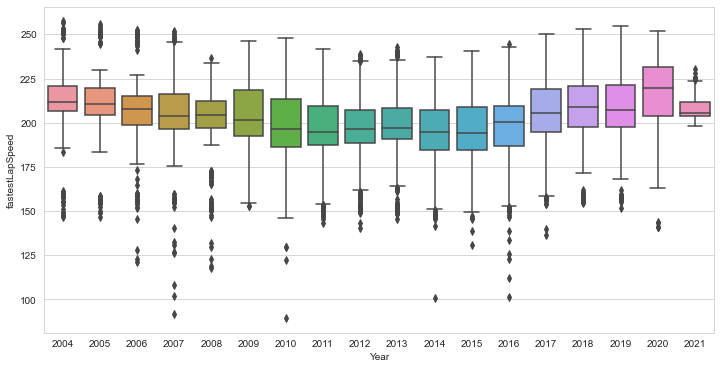

In [22]:
# Top Speed of the Fastest Lap Vs Year

res_1 = results_1[results_1.fastestLapSpeed!='\\N']
res_1.fastestLapSpeed = res_1.fastestLapSpeed.astype('float64')

plt.subplots(figsize=(12,6))
sns.boxplot(y= 'fastestLapSpeed',
             x = 'Year',
             data = res_1)

<AxesSubplot:xlabel='fastestLapSpeed', ylabel='name'>

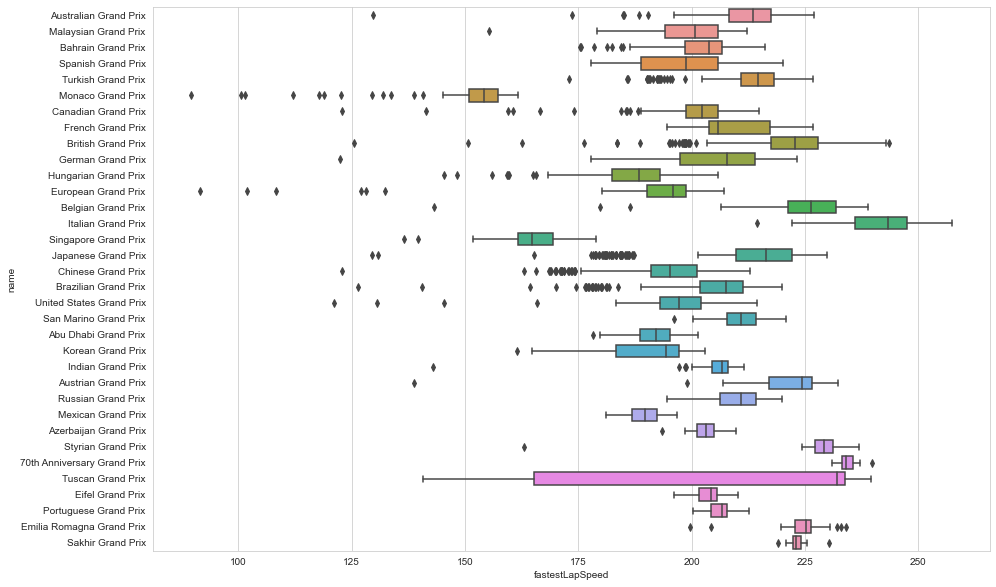

In [23]:
# Top Speed of the Fastest Lap Vs GP

res_2 = results_1[results_1.fastestLapSpeed!='\\N']
res_2.fastestLapSpeed = res_2.fastestLapSpeed.astype('float64')
plt.subplots(figsize=(15,10))
sns.boxplot(data = res_2,
            y = 'name',
            x= 'fastestLapSpeed')

# .figure.savefig("fastestLapSpeed_Vs_GP.jpeg")

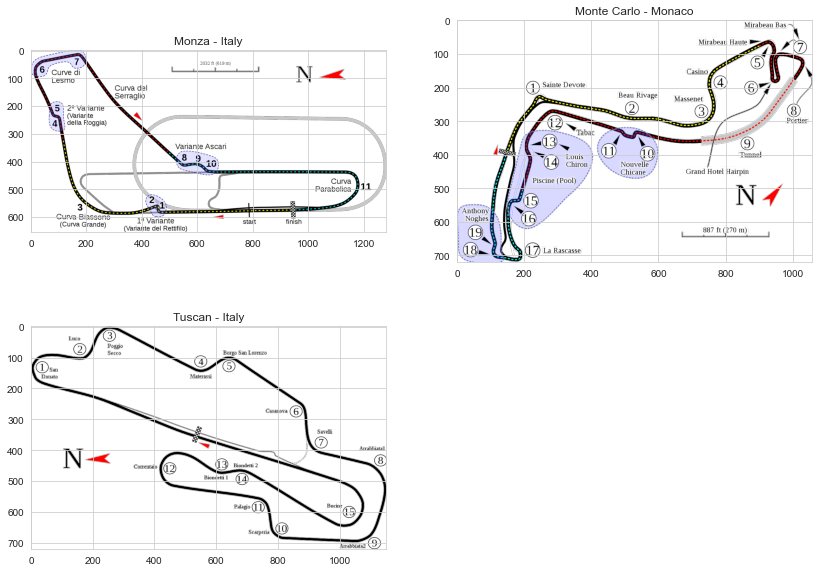

In [24]:
# Read Images
itl = mpimg.imread('monza_italy.png')
mon = mpimg.imread('monte_carlo_monaco.png')
tus = mpimg.imread('tuscan_italy.png')
  
# Output Images
plt.subplots(figsize=(14,10))
plt.subplot(2,2,1)
plt.title("Monza - Italy")
plt.imshow(itl)

plt.subplot(2,2,2)
plt.title("Monte Carlo - Monaco")
plt.imshow(mon)

plt.subplot(2,2,3)
plt.title("Tuscan - Italy")
plt.imshow(tus)

High Tuscan spread due to only single official F1 race has occurred there in 2020 due to Covid-19 rescheduling.

In [25]:
# Top Speed of the Fastest Lap Vs Time of the Fastest Lap Vs GP 

res_3 = results_1[(results_1.fastestLapSpeed!='\\N')]
res_3.fastestLapSpeed = res_3.fastestLapSpeed.astype('float64')

fig = px.scatter(res_3, 
                 x="fastestLapSpeed", 
                 y="fastestLapTime_time_millisecs", 
                 color="name",
                 labels={"fastestLapSpeed": "The Fastest Lap Top Speed",
                         "fastestLapTime_time_millisecs": "The Fastest Lap Time (millisecs)",
                         "name": "GP"})

fig.show()

# report = dp.Report(dp.Plot(fig) ) #Create a report
# params = {'name':'fastestLapSpeedVSfastestLapTime_time',
#          'open':'True'}
# report.publish(**params) 

### 2.2 The Fastest Lap Timing

<AxesSubplot:xlabel='Year', ylabel='fastestLapTime_time_millisecs'>

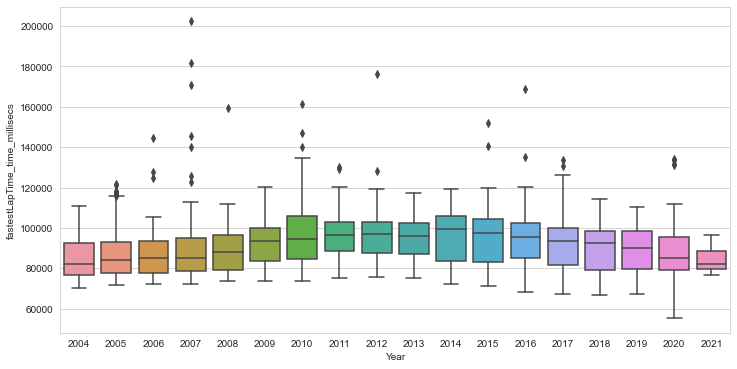

In [26]:
# The Fastest Lap Timing Vs Year

res_4 = results_1[results_1.fastestLapTime_time_millisecs!='\\N']
res_4.fastestLapTime_time_millisecs = res_4.fastestLapTime_time_millisecs.astype('float64')

plt.subplots(figsize=(12,6))
sns.boxplot(y= 'fastestLapTime_time_millisecs',
            x = 'Year',
            data = res_4)

<AxesSubplot:xlabel='fastestLapTime_time_millisecs', ylabel='name'>

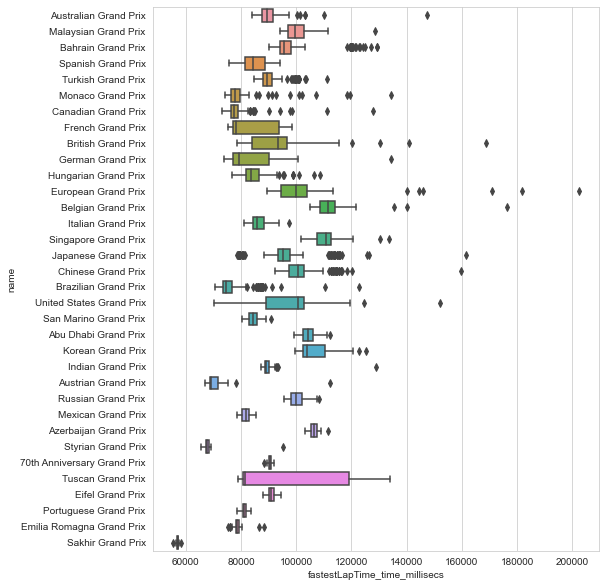

In [27]:
# The Fastest Lap Timing Vs GP

res_5 = results_1[results_1.fastestLapTime_time_millisecs!='\\N']
res_5.fastestLapTime_time_millisecs = res_5.fastestLapTime_time_millisecs.astype('float64')
plt.subplots(figsize=(8,10))
sns.boxplot(data = res_5,
            y = 'name',
            x= 'fastestLapTime_time_millisecs')

`Sakhir` and `Styrian` GPs conducted in 2020 for the first time. 

### 2.3 Race Finish Time

<AxesSubplot:xlabel='Year', ylabel='race_finish_time_millisecs'>

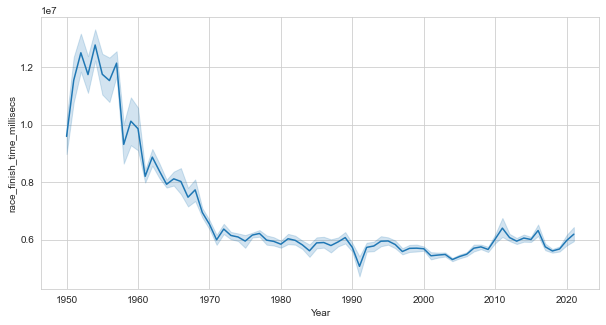

In [28]:
# The Fastest Lap Timing Vs Year

res_6 = results_1[results_1.race_finish_time_millisecs!='\\N']
res_6.race_finish_time_millisecs = res_6.race_finish_time_millisecs.astype('float64')

plt.subplots(figsize=(10,5))
sns.lineplot(y= 'race_finish_time_millisecs',
             x = 'Year',
#            hue='name',
             data = res_6)

More competitiveness can be observed from the above plot.

### 2.4 Rank Vs Position Order

In [29]:
# positionOrder: Final rank/position in the race
# rank: Rank of the fastest lap

res_7 = results_1[(results_1['rank'] == '1')]
# res_7['rank'] = res_7['rank'].astype('int64')

# plt.subplots(figsize=(12,6))
# sns.boxplot(y= 'rank',
#             x = 'positionOrder',
#             data = res_7)
# sns.distplot(res_7['positionOrder'])

fig = px.histogram(res_7, x="positionOrder",
                  labels={"positionOrder": "Final Positions"})
fig.update_layout(bargap=0.2)
fig.show()

# report = dp.Report(dp.Plot(fig) ) #Create a report
# params = {'name':'Final Positions of the fastest lap clocking driver',
#          'open':'True'}
# report.publish(**params) 

Importance of `The Fastest Lap Bonus Points` in championship.

### 2.5 Fastest Lap Number

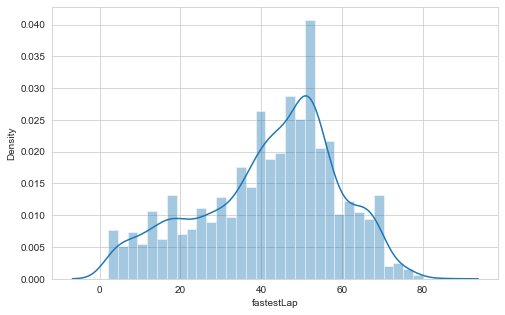

In [30]:
# Fastest lap number

res_8 = results_1[(results_1['fastestLap'] != '\\N')]
res_8['fastestLap'] = res_8['fastestLap'].astype('int64')

plt.subplots(figsize=(8,5))
sns.distplot(res_8['fastestLap']).figure.savefig("fastestLap_number.jpeg")
# sns.displot(data = res_8,
#             x = 'fastestLap',
#            hue = 'name', kind="kde")

### 2.6 Dominance: Winning Driver

In [31]:
# Feature Engineering

res_9 = results_1
fq = res_9.groupby('name').size()//20
res_9.loc[:, "{}_occurrences".format('name')] = res_9['name'].map(fq)
fq1 = res_9.groupby('driverRef').size()
res_9.loc[:, "{}_occurrences".format('driverRef')] = res_9['driverRef'].map(fq1)
res_9.head()

resultId  raceId  driverId  constructorId  grid  positionOrder  points  \
0         1      18         1              1     1              1    10.0   
1         2      18         2              2     5              2     8.0   
2         3      18         3              3     7              3     6.0   
3         4      18         4              4    11              4     5.0   
4         5      18         5              1     3              5     4.0   

   laps race_finish_time_millisecs fastestLap rank fastestLapSpeed    status  \
0    58                    5690616         39    2         218.300  Finished   
1    58                    5696094         41    3         217.586  Finished   
2    58                    5698779         41    5         216.719  Finished   
3    58                    5707797         58    7         215.464  Finished   
4    58                    5708630         43    1         218.385  Finished   

                    name       date   driverRef        dob nationality_driver  \
0  Australian Grand Prix 2008-03-16    hamilton 1985-01-07            British   
1  Australian Grand Prix 2008-03-16    heidfeld 1977-05-10             German   
2  Australian Grand Prix 2008-03-16     rosberg 1985-06-27             German   
3  Australian Grand Prix 2008-03-16      alonso 1981-07-29            Spanish   
4  Australian Grand Prix 2008-03-16  kovalainen 1981-10-19            Finnish   

  constructorRef nationality_constructor  Year fastestLapTime_time_millisecs  \
0        mclaren                 British  2008                       87452.0   
1     bmw_sauber                  German  2008                       87739.0   
2       williams                 British  2008                       88090.0   
3        renault                  French  2008                       88603.0   
4        mclaren                 British  2008                       87418.0   

   name_occurrences  driverRef_occurrences  
0                41                    270  
1                41                    184  
2                41                    206  
3                41                    318  
4                41                    112

<AxesSubplot:xlabel='name', ylabel='driverRef'>

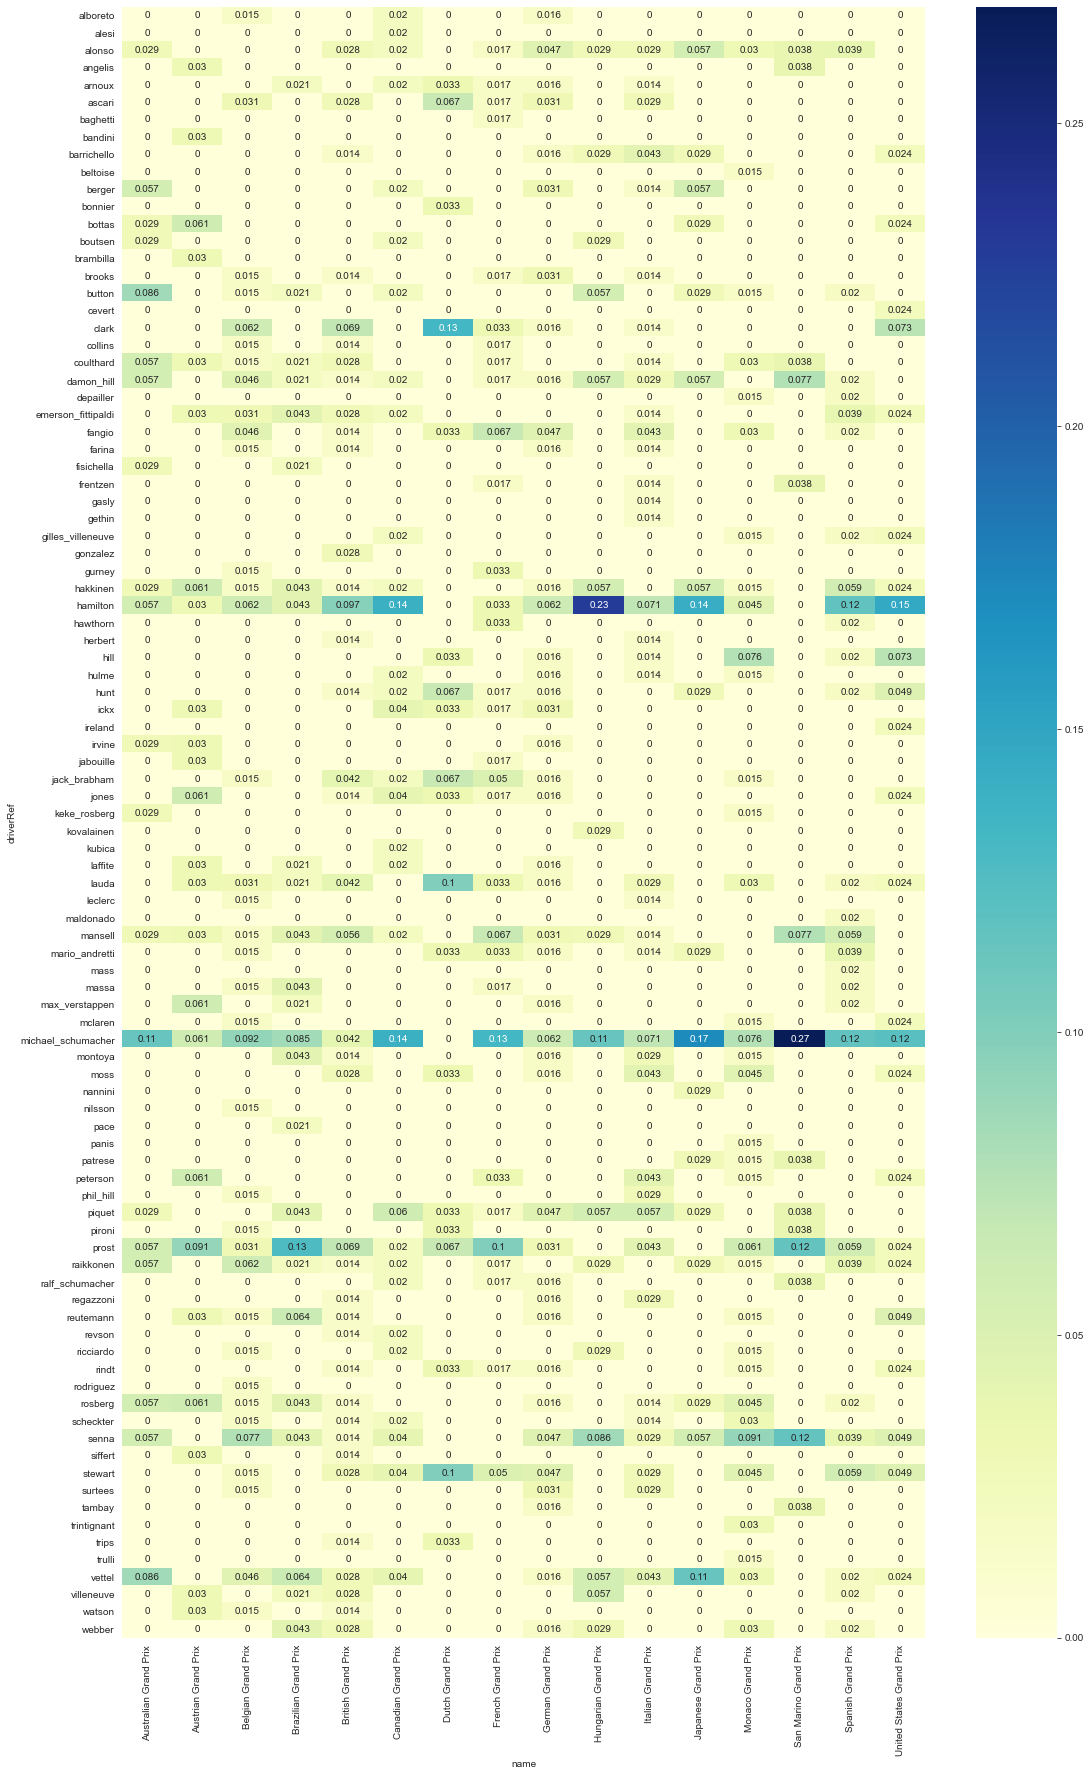

In [32]:
# GP Vs Driver Vs (No of xyz GP won by driver/Total xyz GP conducted)

plt.subplots(figsize=(18, 30))
sns.heatmap(pd.crosstab(columns = res_9[(res_9['positionOrder'] == 1) & (res_9['name_occurrences'] >= 30) & (res_9['driverRef_occurrences'] >= 20)]['name'],
            index =  res_9[(res_9['positionOrder'] == 1) & (res_9['name_occurrences'] >= 30) & (res_9['driverRef_occurrences'] >= 20)]['driverRef'],
            normalize = 'columns'),
            cmap = 'YlGnBu',
            annot = True)
# .figure.savefig("Drivers_Vs_GP_Vs_wins.jpeg")

- Michael Schumacher: San Marino GP 
- Hamilton: Hungarian GP

### 2.7 Dominance: Grid/Pole Position Driver

<AxesSubplot:xlabel='name', ylabel='driverRef'>

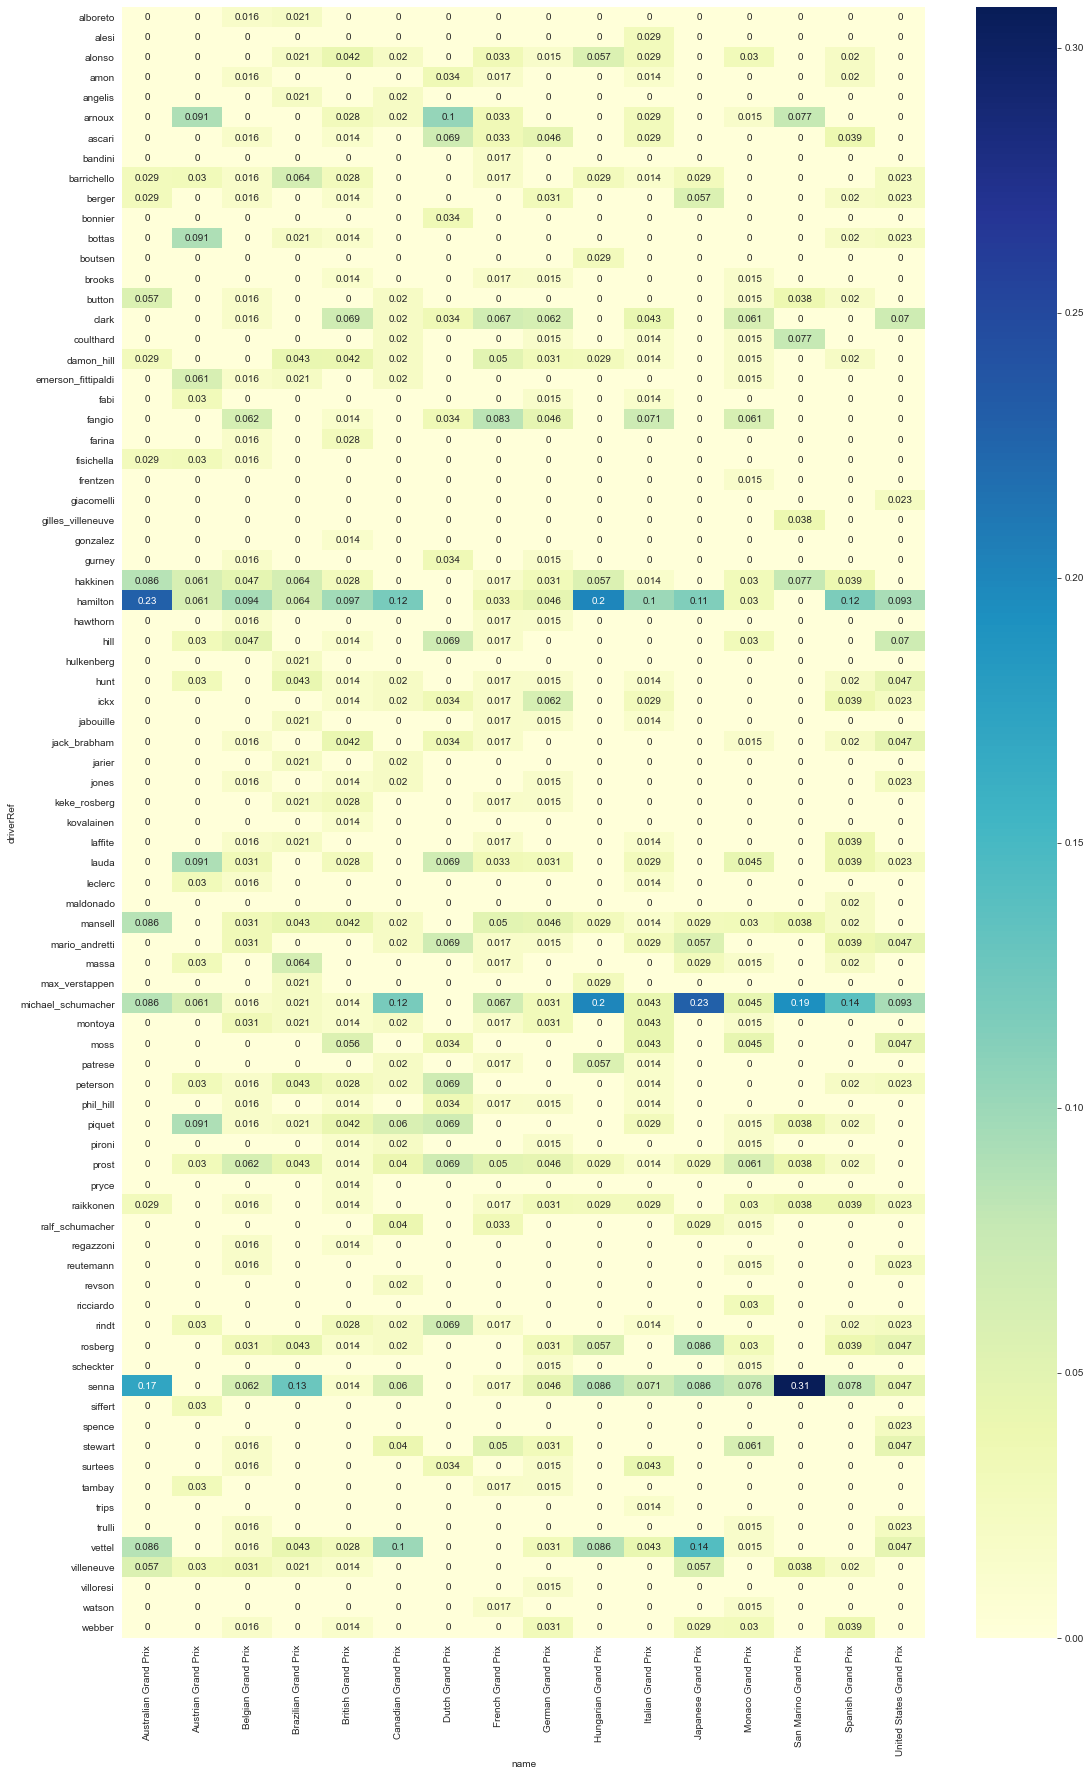

In [33]:
# GP Vs Driver Vs (No of poles in xyz GP by driver/Total xyz GP conducted)

plt.subplots(figsize=(18, 30))
sns.heatmap(pd.crosstab(columns = res_9[(res_9['grid'] == 1) & (res_9['name_occurrences'] >= 30) & (res_9['driverRef_occurrences'] >= 20)]['name'],
            index =  res_9[(res_9['grid'] == 1) & (res_9['name_occurrences'] >= 30) & (res_9['driverRef_occurrences'] >= 20)]['driverRef'],
            normalize = 'columns'),
            cmap = 'YlGnBu',
            annot = True)

- Senna: San Marino GP

### 2.8 Pit Stops

In [34]:
# Readng pit-stops data

pit_stops = pd.read_csv('pit_stops.csv')
print(pit_stops.shape)
print(' ')
print(pit_stops.info())
print(' ')

pit_stops.head()

(8223, 7)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        8223 non-null   int64 
 1   driverId      8223 non-null   int64 
 2   stop          8223 non-null   int64 
 3   lap           8223 non-null   int64 
 4   time          8223 non-null   object
 5   duration      8223 non-null   object
 6   milliseconds  8223 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 449.8+ KB
None
 


raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842

In [35]:
# Cleaning 

pit_stops_1 = pit_stops.drop(['lap', 'time', 'duration'], axis=1)
pit_stops_1 = pit_stops_1.groupby(['raceId', 'driverId']).mean().reset_index()
pit_stops_1.head()

raceId  driverId  stop  milliseconds
0     841         1   1.5       23213.0
1     841         2   1.5       24046.0
2     841         3   1.0       23716.0
3     841         4   2.0       24055.0
4     841         5   1.0       24865.0

In [36]:
# Constructing dataframe

res_10 = pd.merge(left=results_1, right=pit_stops_1, left_on=['raceId', 'driverId'],
                     right_on=['raceId', 'driverId'], how='right')
res_10.head()

resultId  raceId  driverId  constructorId  grid  positionOrder  points  \
0     20780     841         1              1     2              2    18.0   
1     20790     841         2              4    18             12     0.0   
2     20795     841         3            131     7             17     0.0   
3     20782     841         4              6     5              4    12.0   
4     20796     841         5            205    19             18     0.0   

   laps race_finish_time_millisecs fastestLap rank fastestLapSpeed  \
0    58                    5392556         41    8         211.382   
1    57                         \N         43   15         206.661   
2    22                         \N         21   17         204.173   
3    58                    5402031         49    2         213.336   
4    19                         \N         19   20         201.129   

       status                   name       date   driverRef        dob  \
0    Finished  Australian Grand Prix 2011-03-27    hamilton 1985-01-07   
1      +1 Lap  Australian Grand Prix 2011-03-27    heidfeld 1977-05-10   
2   Collision  Australian Grand Prix 2011-03-27     rosberg 1985-06-27   
3    Finished  Australian Grand Prix 2011-03-27      alonso 1981-07-29   
4  Water leak  Australian Grand Prix 2011-03-27  kovalainen 1981-10-19   

  nationality_driver constructorRef nationality_constructor  Year  \
0            British        mclaren                 British  2011   
1             German        renault                  French  2011   
2             German       mercedes                  German  2011   
3            Spanish        ferrari                 Italian  2011   
4            Finnish   lotus_racing               Malaysian  2011   

  fastestLapTime_time_millisecs  name_occurrences  driverRef_occurrences  \
0                       90314.0                41                    270   
1                       92377.0                41                    184   
2                       93503.0                41                    206   
3                       89487.0                41                    318   
4                       94918.0                41                    112   

   stop  milliseconds  
0   1.5       23213.0  
1   1.5       24046.0  
2   1.0       23716.0  
3   2.0       24055.0  
4   1.0       24865.0

<AxesSubplot:xlabel='Year', ylabel='stop'>

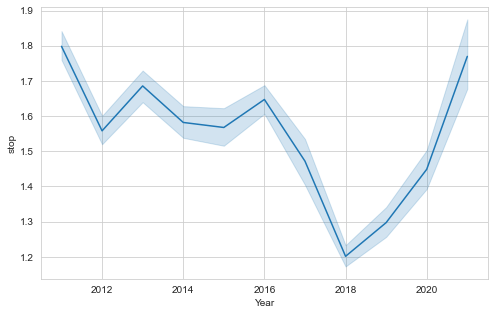

In [37]:
# No of pit stops Vs Year

plt.subplots(figsize=(8,5))
sns.lineplot(data = res_10,
            y = 'stop',
            x= 'Year')

<AxesSubplot:xlabel='Year', ylabel='milliseconds'>

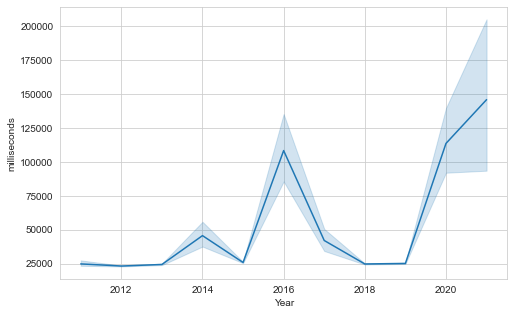

In [38]:
# Total Pit time Vs Year

plt.subplots(figsize=(8,5))
sns.lineplot(data = res_10,
            y = 'milliseconds',
            x= 'Year')

<AxesSubplot:xlabel='milliseconds', ylabel='name'>

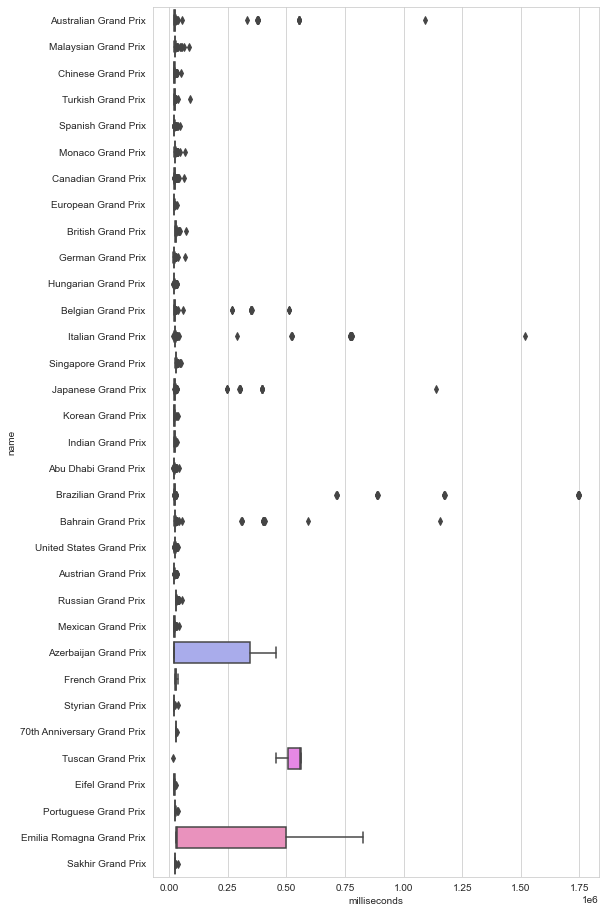

In [39]:
# Total pit time Vs GP

plt.subplots(figsize=(8,16))
sns.boxplot(data = res_10,
            x = 'milliseconds',
            y = 'name')

### 2.9 Constructor Performance

In [40]:
# Reading data

constructor_standings = pd.read_csv('constructor_standings.csv')
print(constructor_standings.shape)
print(' ')
print(constructor_standings.info())
print(' ')
constructor_standings.head()

(12536, 7)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12536 entries, 0 to 12535
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12536 non-null  int64  
 1   raceId                  12536 non-null  int64  
 2   constructorId           12536 non-null  int64  
 3   points                  12536 non-null  float64
 4   position                12536 non-null  int64  
 5   positionText            12536 non-null  object 
 6   wins                    12536 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 685.7+ KB
None
 


constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

In [41]:
# Cleaning 

constructor_standings = constructor_standings.drop(['constructorStandingsId', 'points', 'position', 'positionText'],
                                                   axis=1)

In [42]:
# Creating dataframe

res_11 = pd.merge(left=results_1, right=constructor_standings, left_on=['raceId', 'constructorId'],
                     right_on=['raceId', 'constructorId'], how='right')
res_11.head()

resultId  raceId  driverId  constructorId  grid  positionOrder  points  \
0       1.0      18       1.0              1   1.0            1.0    10.0   
1       5.0      18       5.0              1   3.0            5.0     4.0   
2       2.0      18       2.0              2   5.0            2.0     8.0   
3       9.0      18       9.0              2   2.0            9.0     0.0   
4       3.0      18       3.0              3   7.0            3.0     6.0   

   laps race_finish_time_millisecs fastestLap rank fastestLapSpeed     status  \
0  58.0                    5690616         39    2         218.300   Finished   
1  58.0                    5708630         43    1         218.385   Finished   
2  58.0                    5696094         41    3         217.586   Finished   
3  47.0                         \N         15    9         215.100  Collision   
4  58.0                    5698779         41    5         216.719   Finished   

                    name       date   driverRef        dob nationality_driver  \
0  Australian Grand Prix 2008-03-16    hamilton 1985-01-07            British   
1  Australian Grand Prix 2008-03-16  kovalainen 1981-10-19            Finnish   
2  Australian Grand Prix 2008-03-16    heidfeld 1977-05-10             German   
3  Australian Grand Prix 2008-03-16      kubica 1984-12-07             Polish   
4  Australian Grand Prix 2008-03-16     rosberg 1985-06-27             German   

  constructorRef nationality_constructor    Year  \
0        mclaren                 British  2008.0   
1        mclaren                 British  2008.0   
2     bmw_sauber                  German  2008.0   
3     bmw_sauber                  German  2008.0   
4       williams                 British  2008.0   

  fastestLapTime_time_millisecs  name_occurrences  driverRef_occurrences  wins  
0                       87452.0              41.0                  270.0     1  
1                       87418.0              41.0                  112.0     1  
2                       87739.0              41.0                  184.0     0  
3                       88753.0              41.0                   97.0     0  
4                       88090.0              41.0                  206.0     0

In [43]:
# feature engineering

fq2 = res_11.groupby('constructorRef').size()
res_11.loc[:, "{}_occurrences".format('constructorRef')] = res_11['constructorRef'].map(fq2)
res_11.head()

resultId  raceId  driverId  constructorId  grid  positionOrder  points  \
0       1.0      18       1.0              1   1.0            1.0    10.0   
1       5.0      18       5.0              1   3.0            5.0     4.0   
2       2.0      18       2.0              2   5.0            2.0     8.0   
3       9.0      18       9.0              2   2.0            9.0     0.0   
4       3.0      18       3.0              3   7.0            3.0     6.0   

   laps race_finish_time_millisecs fastestLap rank fastestLapSpeed     status  \
0  58.0                    5690616         39    2         218.300   Finished   
1  58.0                    5708630         43    1         218.385   Finished   
2  58.0                    5696094         41    3         217.586   Finished   
3  47.0                         \N         15    9         215.100  Collision   
4  58.0                    5698779         41    5         216.719   Finished   

                    name       date   driverRef        dob nationality_driver  \
0  Australian Grand Prix 2008-03-16    hamilton 1985-01-07            British   
1  Australian Grand Prix 2008-03-16  kovalainen 1981-10-19            Finnish   
2  Australian Grand Prix 2008-03-16    heidfeld 1977-05-10             German   
3  Australian Grand Prix 2008-03-16      kubica 1984-12-07             Polish   
4  Australian Grand Prix 2008-03-16     rosberg 1985-06-27             German   

  constructorRef nationality_constructor    Year  \
0        mclaren                 British  2008.0   
1        mclaren                 British  2008.0   
2     bmw_sauber                  German  2008.0   
3     bmw_sauber                  German  2008.0   
4       williams                 British  2008.0   

  fastestLapTime_time_millisecs  name_occurrences  driverRef_occurrences  \
0                       87452.0              41.0                  270.0   
1                       87418.0              41.0                  112.0   
2                       87739.0              41.0                  184.0   
3                       88753.0              41.0                   97.0   
4                       88090.0              41.0                  206.0   

   wins  constructorRef_occurrences  
0     1                      1743.0  
1     1                      1743.0  
2     0                       140.0  
3     0                       140.0  
4     0                      1503.0

<AxesSubplot:xlabel='name', ylabel='constructorRef'>

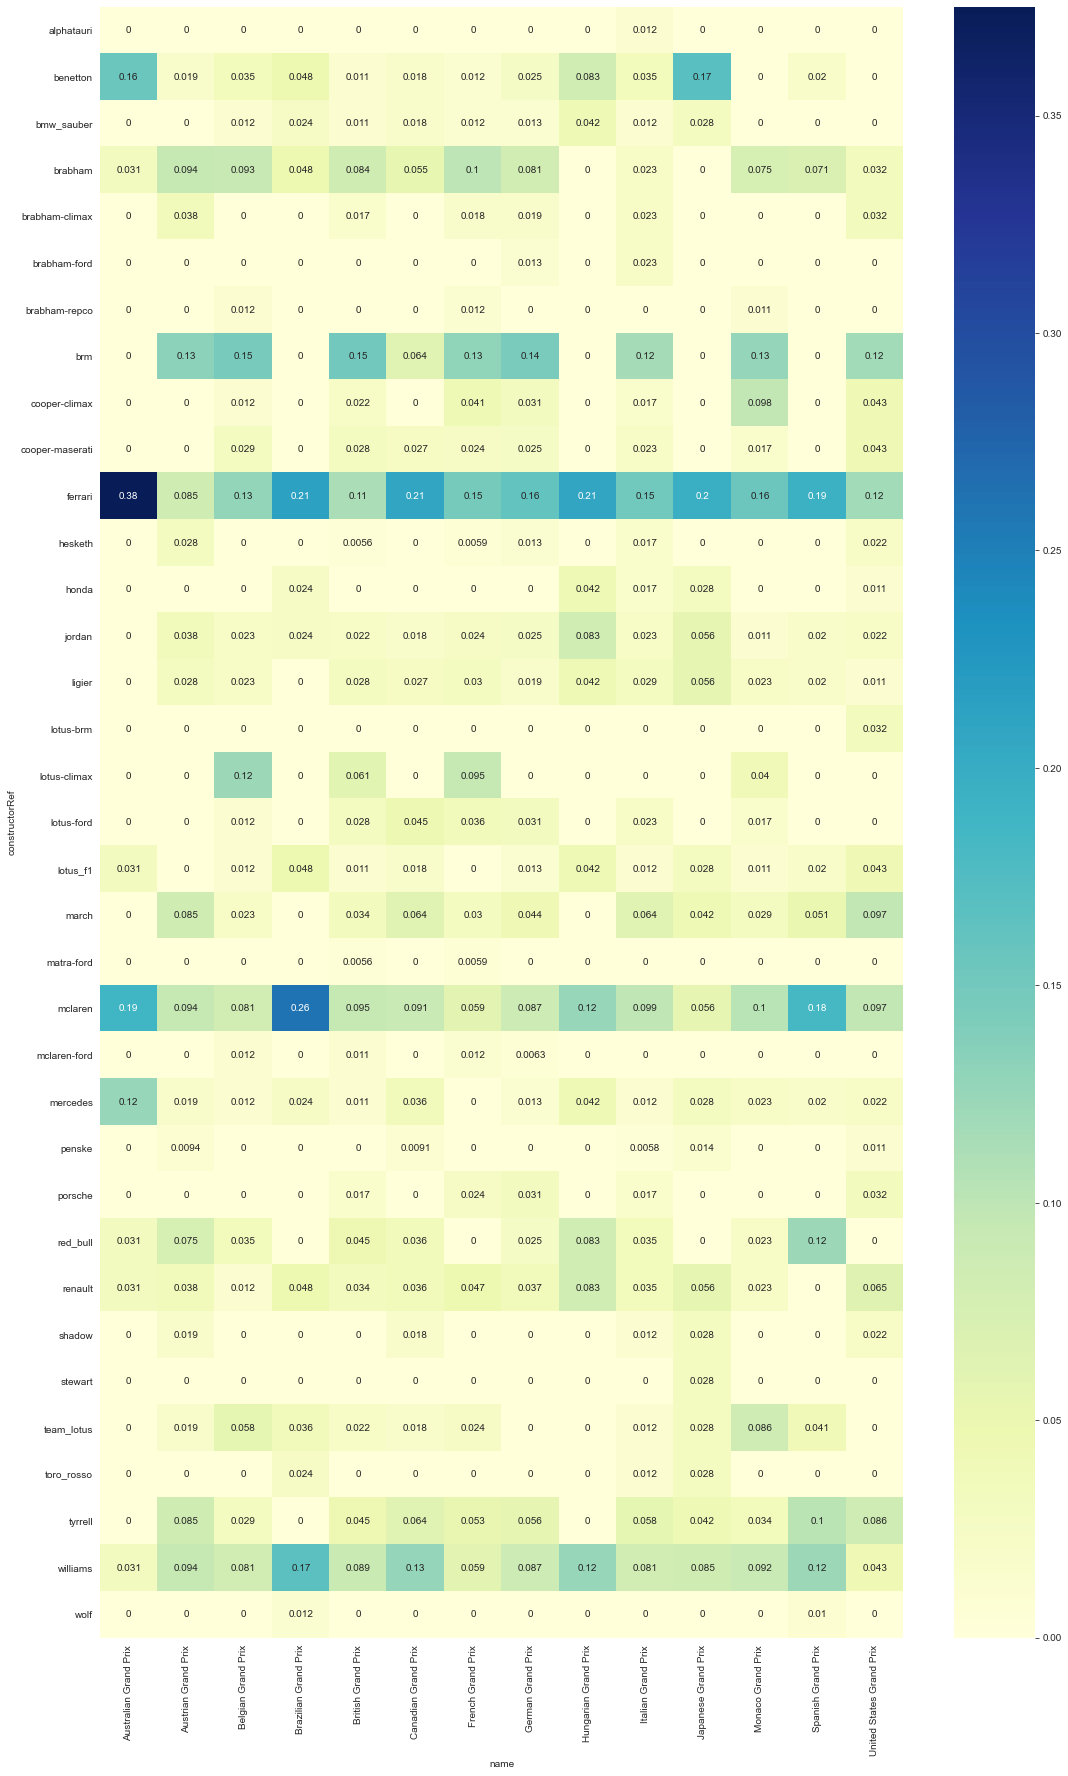

In [44]:
# GP Vs Constructor Vs (No of xyz GP won by Constructor/Total xyz GP conducted)

plt.subplots(figsize=(18, 30))
sns.heatmap(pd.crosstab(columns = res_11[(res_11['wins'] == 1) & (res_11['name_occurrences'] >= 40) & (res_11['constructorRef_occurrences'] >= 40)]['name'],
            index =  res_11[(res_11['wins'] == 1) & (res_11['name_occurrences'] >= 40) & (res_11['constructorRef_occurrences'] >= 40)]['constructorRef'],
            normalize = 'columns'),
            cmap = 'YlGnBu',
            annot = True)
# .figure.savefig("Constructors_Vs_GP_Vs_wins.jpeg")

- Ferrari: Australian GP, San Marino GP
- Mclaren: san Marino GP

# 3. Conclusion

F1 is a sport with intense competition. Even a fraction of second matters to differentiate winner from the rest. High number of parameters and requirement of the smartest strategy demands the implementation of statistical and data science techniques.

--------------